# Dipole elements decay

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ryd_numerov.rydberg import RydbergState

In [2]:
state = RydbergState("Rb", n=60, l=0, j=0.5, m=0.5)

In [3]:
states_sp, transition_rates_sp = state.get_spontaneous_transition_rates(unit="1/mus")
print(f"Number of possible spontaneous decay transitions: {len(transition_rates_sp)}")

states_bbr, transition_rates_bbr = state.get_black_body_transition_rates(300, "kelvin", unit="1/mus")
print(f"Number of considered BBR transitions: {len(transition_rates_bbr)}")

Number of possible spontaneous decay transitions: 275
Number of considered BBR transitions: 430


In [4]:
relevant_states, energy_differences, electric_dipole_moments = state._get_list_of_dipole_coupled_states(  # noqa: SLF001
    1, 120, only_smaller_energy=False
)

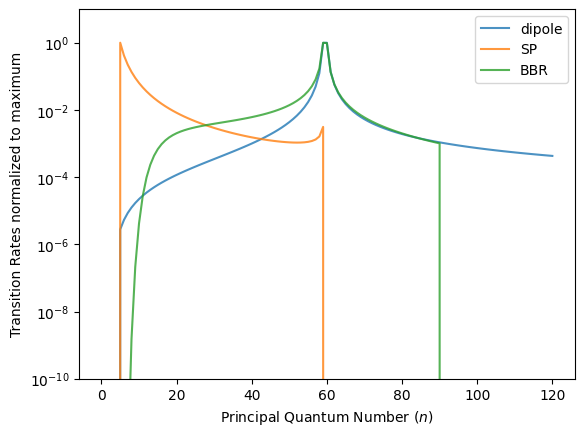

In [5]:
fig, ax = plt.subplots()

n_list = np.arange(0, np.max([s.n for s in relevant_states]) + 1)
rates_summed = {key: np.zeros(len(n_list)) for key in ["dipole", "SP", "BBR"]}

for i, s in enumerate(relevant_states):
    rates_summed["dipole"][s.n] += electric_dipole_moments[i]

    if i < len(transition_rates_sp):
        rates_summed["SP"][s.n] += transition_rates_sp[i]

    if i < len(transition_rates_bbr):
        rates_summed["BBR"][s.n] += transition_rates_bbr[i]

for key, values in rates_summed.items():
    values_normalized = np.abs(values) / np.max(np.abs(values))
    ax.plot(n_list, values_normalized, label=key, alpha=0.8)

ax.legend()

ax.set_xlabel("Principal Quantum Number ($n$)")
ax.set_ylabel(r"Transition Rates normalized to maximum")

ax.set_yscale("log")
ax.set_ylim(1e-10, 1e1)

plt.show()